In [2]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [26]:
words=pd.read_csv("data/amharic_names.csv")
am_words=words["in_am"].tolist()

In [513]:
chars=sorted(list((set("".join(am_words)))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi["-"]=1
stoi["."]=0
itos={i:s for s,i in stoi.items()}

In [56]:
block_size=3
X,Y=[],[]
for w in am_words[:4]:
    print(w)
    context=[0]*block_size
    for ch in w + ".":
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        print("".join(itos[i] for i in context),'---->',itos[ix])
        context=context[1:]+[ix]
X=torch.tensor(X)
Y=torch.tensor(Y)

አሮን
... ----> አ
..አ ----> ሮ
.አሮ ----> ን
አሮን ----> .
ዐብድኤል
... ----> ዐ
..ዐ ----> ብ
.ዐብ ----> ድ
ዐብድ ----> ኤ
ብድኤ ----> ል
ድኤል ----> .
አቤል
... ----> አ
..አ ----> ቤ
.አቤ ----> ል
አቤል ----> .
አቢዳጽ
... ----> አ
..አ ----> ቢ
.አቢ ----> ዳ
አቢዳ ----> ጽ
ቢዳጽ ----> .


In [60]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([19, 3]), torch.int64, torch.Size([19]), torch.int64)

embeding

In [70]:
C=torch.randn((188,2))

In [83]:
# embeding one dimensional tensor
C[5] #method-----one

tensor([1.2956, 0.0068])

In [79]:
# method---- two
F.one_hot(torch.tensor(5),num_classes=188).float() @ C

tensor([1.2956, 0.0068])

In [87]:
# how do we simultanously multi dimensional
C[X]  # method----one
C[X].shape

torch.Size([19, 3, 2])

In [89]:
print(X[13,2])
print(C[X][13,2])
print(C[14])

tensor(14)
tensor([0.3315, 0.3698])
tensor([0.3315, 0.3698])


In [123]:
## pytorch embeding 
C=torch.randn((188,2))
embed=C[X]
embed.dtype
embed.shape

torch.Size([19, 3, 2])

concat the embed inoreder to do the multiplication with W

In [105]:
# method one but not generalize(during change of the block size value)
torch.cat([embed[:,0,:],embed[:,1,:],embed[:,2,:]],1)

tensor([[ 0.5033,  1.5342,  0.5033,  1.5342,  0.5033,  1.5342],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.1354, -1.6490],
        [ 0.5033,  1.5342,  0.1354, -1.6490,  1.0937, -0.6189],
        [ 0.1354, -1.6490,  1.0937, -0.6189,  0.9206, -0.9490],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.5033,  1.5342],
        [ 0.5033,  1.5342,  0.5033,  1.5342, -0.7817,  0.8748],
        [ 0.5033,  1.5342, -0.7817,  0.8748, -1.1031, -1.1599],
        [-0.7817,  0.8748, -1.1031, -1.1599,  0.4824, -0.4671],
        [-1.1031, -1.1599,  0.4824, -0.4671, -1.4536, -0.0434],
        [ 0.4824, -0.4671, -1.4536, -0.0434, -1.4797, -0.2591],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.5033,  1.5342],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.1354, -1.6490],
        [ 0.5033,  1.5342,  0.1354, -1.6490, -1.2548, -0.1698],
        [ 0.1354, -1.6490, -1.2548, -0.1698, -1.4797, -0.2591],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.5033,  1.5342],
        [ 0.5033,  1.5342,  0.5033,  1.5

In [110]:
# method--two
torch.cat(torch.unbind(embed,1),1).shape

torch.Size([19, 6])

In [114]:
#method--three
embed.view(19,6)

tensor([[ 0.5033,  1.5342,  0.5033,  1.5342,  0.5033,  1.5342],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.1354, -1.6490],
        [ 0.5033,  1.5342,  0.1354, -1.6490,  1.0937, -0.6189],
        [ 0.1354, -1.6490,  1.0937, -0.6189,  0.9206, -0.9490],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.5033,  1.5342],
        [ 0.5033,  1.5342,  0.5033,  1.5342, -0.7817,  0.8748],
        [ 0.5033,  1.5342, -0.7817,  0.8748, -1.1031, -1.1599],
        [-0.7817,  0.8748, -1.1031, -1.1599,  0.4824, -0.4671],
        [-1.1031, -1.1599,  0.4824, -0.4671, -1.4536, -0.0434],
        [ 0.4824, -0.4671, -1.4536, -0.0434, -1.4797, -0.2591],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.5033,  1.5342],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.1354, -1.6490],
        [ 0.5033,  1.5342,  0.1354, -1.6490, -1.2548, -0.1698],
        [ 0.1354, -1.6490, -1.2548, -0.1698, -1.4797, -0.2591],
        [ 0.5033,  1.5342,  0.5033,  1.5342,  0.5033,  1.5342],
        [ 0.5033,  1.5342,  0.5033,  1.5

In [ ]:
W1=torch.randn((6,100)) 
b1=torch.randn(100)

In [118]:
h=torch.tanh(embed.view(-1,6)@W1 +b1)
h.shape

torch.Size([19, 100])

In [124]:
W2=torch.randn((100,188)) 
b2=torch.randn(188)

In [126]:
logits=h @ W2+ b2
logits.shape

torch.Size([19, 188])

In [130]:
# this is inefficient because it takes memory 
counts=logits.exp() #create the fake counts
prob= counts/counts.sum(1,keepdim=True)
loss=-prob[torch.arange(19),Y].log().mean()
loss

tensor(26.7469)

In [134]:
# forward pass will be much more efficient 
# the backward pass will be more efficient
# numerically well behaved
F.cross_entropy(logits,Y) 

tensor(26.7469)

conclusion

In [455]:
def build_dataset(am_words):
    block_size=3
    X,Y=[],[]
    for w in am_words:
        #print(w)
        context=[0]*block_size
        for ch in w + ".":
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            #print("".join(itos[i] for i in context),'---->',itos[ix])
            context=context[1:]+[ix]
    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y

In [456]:
import random
random.seed(42)
random.shuffle(am_words)
n1=int(0.8*(len(am_words)))
n2=int(0.9*(len(am_words)))

Xtr,Ytr=build_dataset(am_words[:n1])
Xval,Yval=build_dataset(am_words[n1:n2])
Xte,Yte=build_dataset(am_words[n2:])

torch.Size([4423, 3]) torch.Size([4423])
torch.Size([564, 3]) torch.Size([564])
torch.Size([556, 3]) torch.Size([556])


In [457]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((188,2),generator=g)
W1=torch.randn((6,100),generator=g)
b1=torch.randn(100,generator=g)
W2=torch.randn((100,188),generator=g)
b2=torch.randn(188,generator=g)
parameters=[C,W1,b1,W2,b2]
for p in parameters:
    p.requires_grad=True

In [458]:
# lre=torch.linspace(-4,0,1000)
# lrs=10**lre

In [509]:
# lri=[]
# lossi=[]
for i in range(30000):
    #minibach construct
    ix=torch.randint(0,Xtr.shape[0],(32,))

    #forward pass
    embed=C[Xtr[ix]]
    h=torch.tanh(embed.view(-1,6)@W1 +b1)
    logits=h@W2+b2
    loss=F.cross_entropy(logits,Ytr[ix]) 
   

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()


    #update
    lr=0.1
    for p in parameters:
        p.data+=-lr*p.grad
            
    # #tradk
    # lri.append(lre[i])
    # lossi.append(loss.item())
print(loss.item())

2.3487539291381836


In [485]:
sum(p.nelement() for p in parameters)

20064

In [510]:
embed=C[Xtr]
h=torch.tanh(embed.view(-1,6)@W1 +b1)
logits=h@W2+b2
losstr=F.cross_entropy(logits,Ytr).item() 
losstr

1.982420563697815

In [511]:
embed=C[Xval]
h=torch.tanh(embed.view(-1,6)@W1 +b1)
logits=h@W2+b2
lossval=F.cross_entropy(logits,Yval).item()
lossval

6.329527854919434

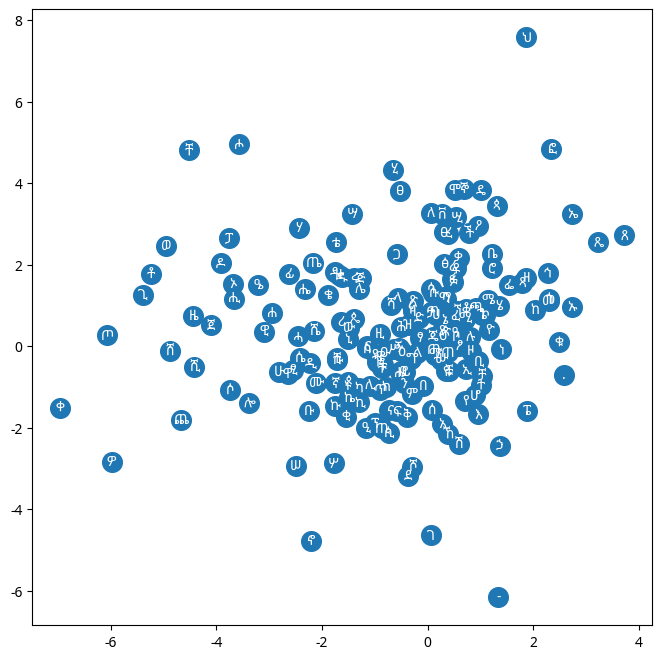

In [508]:
from matplotlib import font_manager
font_manager.fontManager.addfont("data/NotoSansEthiopic-Regular.ttf")
plt.rcParams["font.family"]="Noto Sans Ethiopic"
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].detach().numpy(), C[:, 1].detach().numpy(), s=200)  

for i in range(C.shape[0]):
    x, y = C[i, 0].item(), C[i, 1].item()
    if x != 0 and y != 0:  
        plt.text(x, y, itos[i], ha="center", va="center", color="white")
    else:
        print("none")

plt.grid(which="minor")
plt.show()

In [512]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size  # initialize with all ...
    while True:
        emb = C[torch.tensor([context])]  # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        out.append(ix)
        context = context[1:] + [ix]
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))


ሸማያ.
አሸንር.
ታማ.
አሰፋ.
ዩል.
ደበበ.
ሳምና.
ጣባ.
ያራጥያ.
ኤልያና.
ማፌል.
በርጤሜዎስ.
ፀሌን.
ሐሬኤል.
ጵዛር.
ኤልያድያ.
አውግስጦስ.
እስጢፋኖስ.
ይዛቸው.
አልማ.
